In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [305]:
df_train = pd.read_csv('train.csv')

In [306]:
df_test = pd.read_csv('test.csv')

In [307]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [308]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [309]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [310]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Working with missing Values

In [311]:
missing_count = (df_train.isnull().sum()/len(df_train)) *100

#filter to find the missing count > 0

missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


## Sale Price

In [312]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

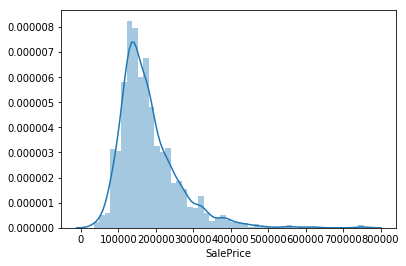

In [313]:
sns.distplot(df_train['SalePrice']);

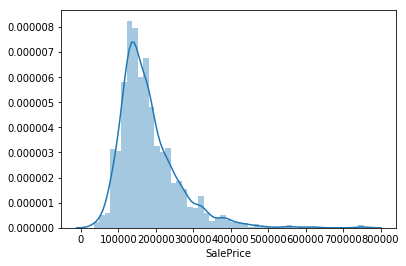

In [314]:
target = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice']);

In [315]:
# Finding numerical features

numeric_data = df_train.select_dtypes(include = [np.number])

#Finding categorial features

categorical_data = df_train.select_dtypes(exclude = [np.number])

In [316]:
print("There are", numeric_data.shape[1], "dataset features")

There are 38 dataset features


In [317]:
print("There are", categorical_data.shape[1], "dataset features")

There are 43 dataset features


In [318]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<h3>Realtionship of SalePrice with numerical Variables<h3>

In [319]:
del numeric_data['Id']
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

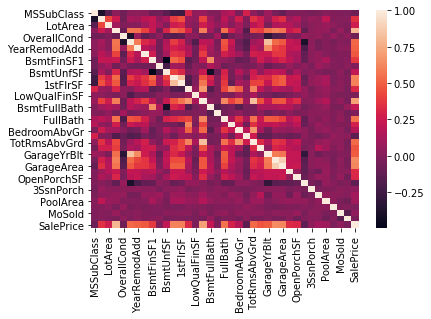

In [320]:
#correltation plot of features on numeric data

corr = numeric_data.corr()
sns.heatmap(corr)

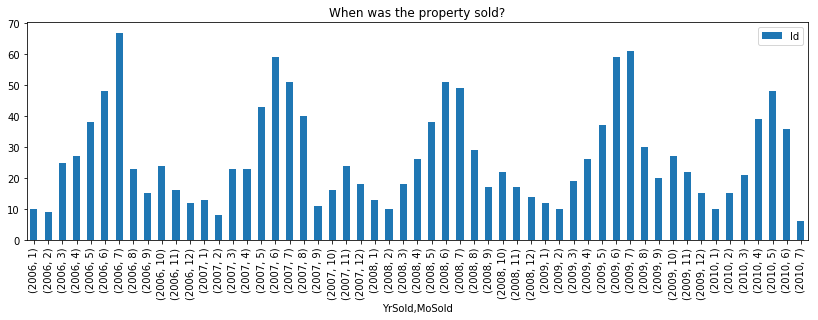

In [321]:
#when was the property sold in which year and month

df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind = 'bar',figsize = (14,4))
plt.title('When was the property sold?')
plt.legend()
plt.show()

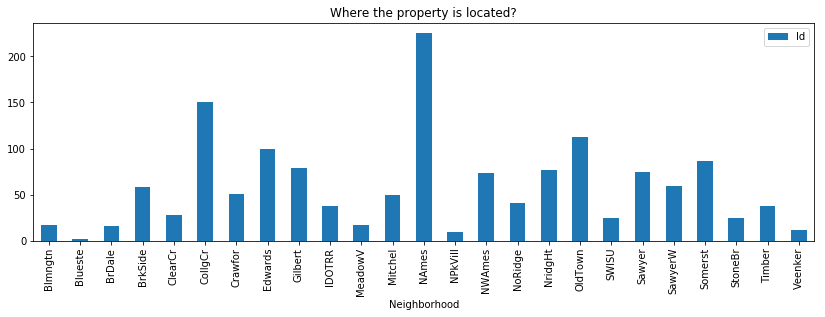

In [322]:
#Where the property is located

df_train.groupby(['Neighborhood']).Id.count().plot(kind = 'bar',figsize = (14,4))
plt.title('Where the property is located?')
plt.legend()
plt.show()

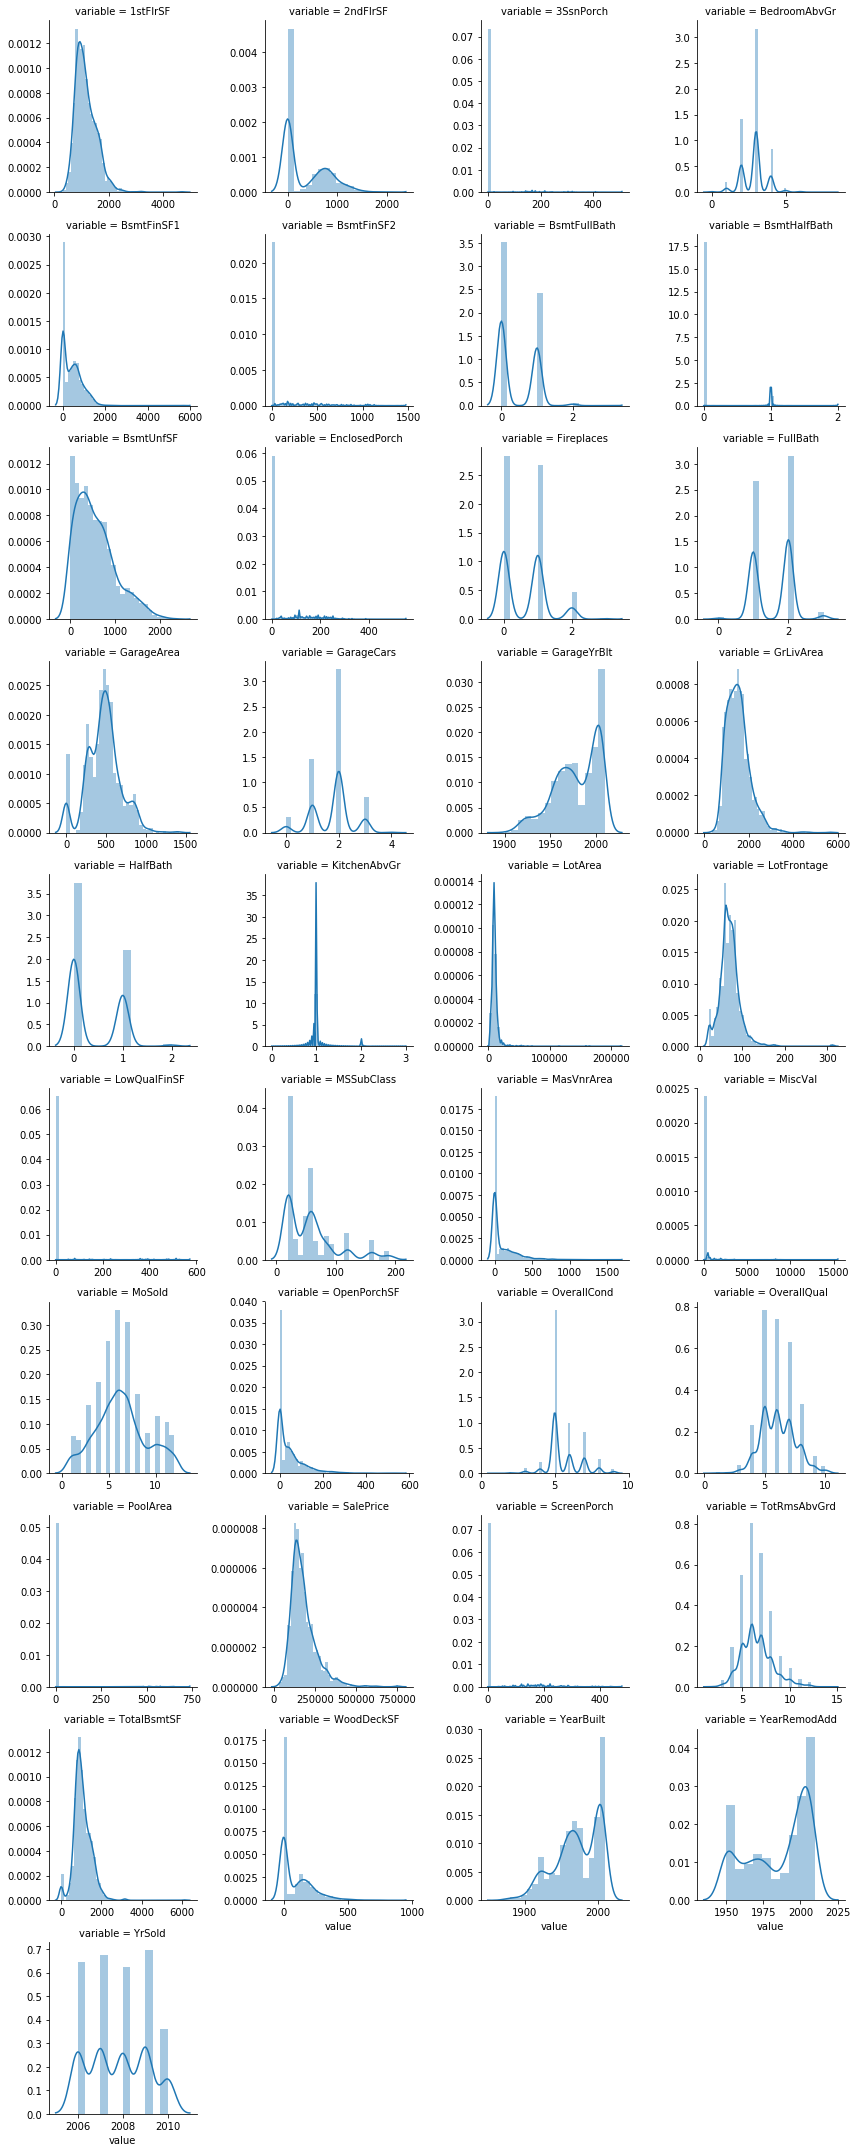

In [323]:
#Distribution of Numerical features

f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [324]:
df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['MoSold'] = df_train.MoSold.apply(lambda x: str(x))
df_train['YrSold'] = df_train.YrSold.apply(lambda x: str(x))

In [325]:
#Finding numerical Features

numeric_data = df_train.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = df_train.select_dtypes(exclude = np.number)


In [326]:
print("There are", numeric_data.shape[1], "dataset features")

There are 35 dataset features


In [327]:
print("There are", categorial_data.shape[1], "dataset features")

There are 46 dataset features


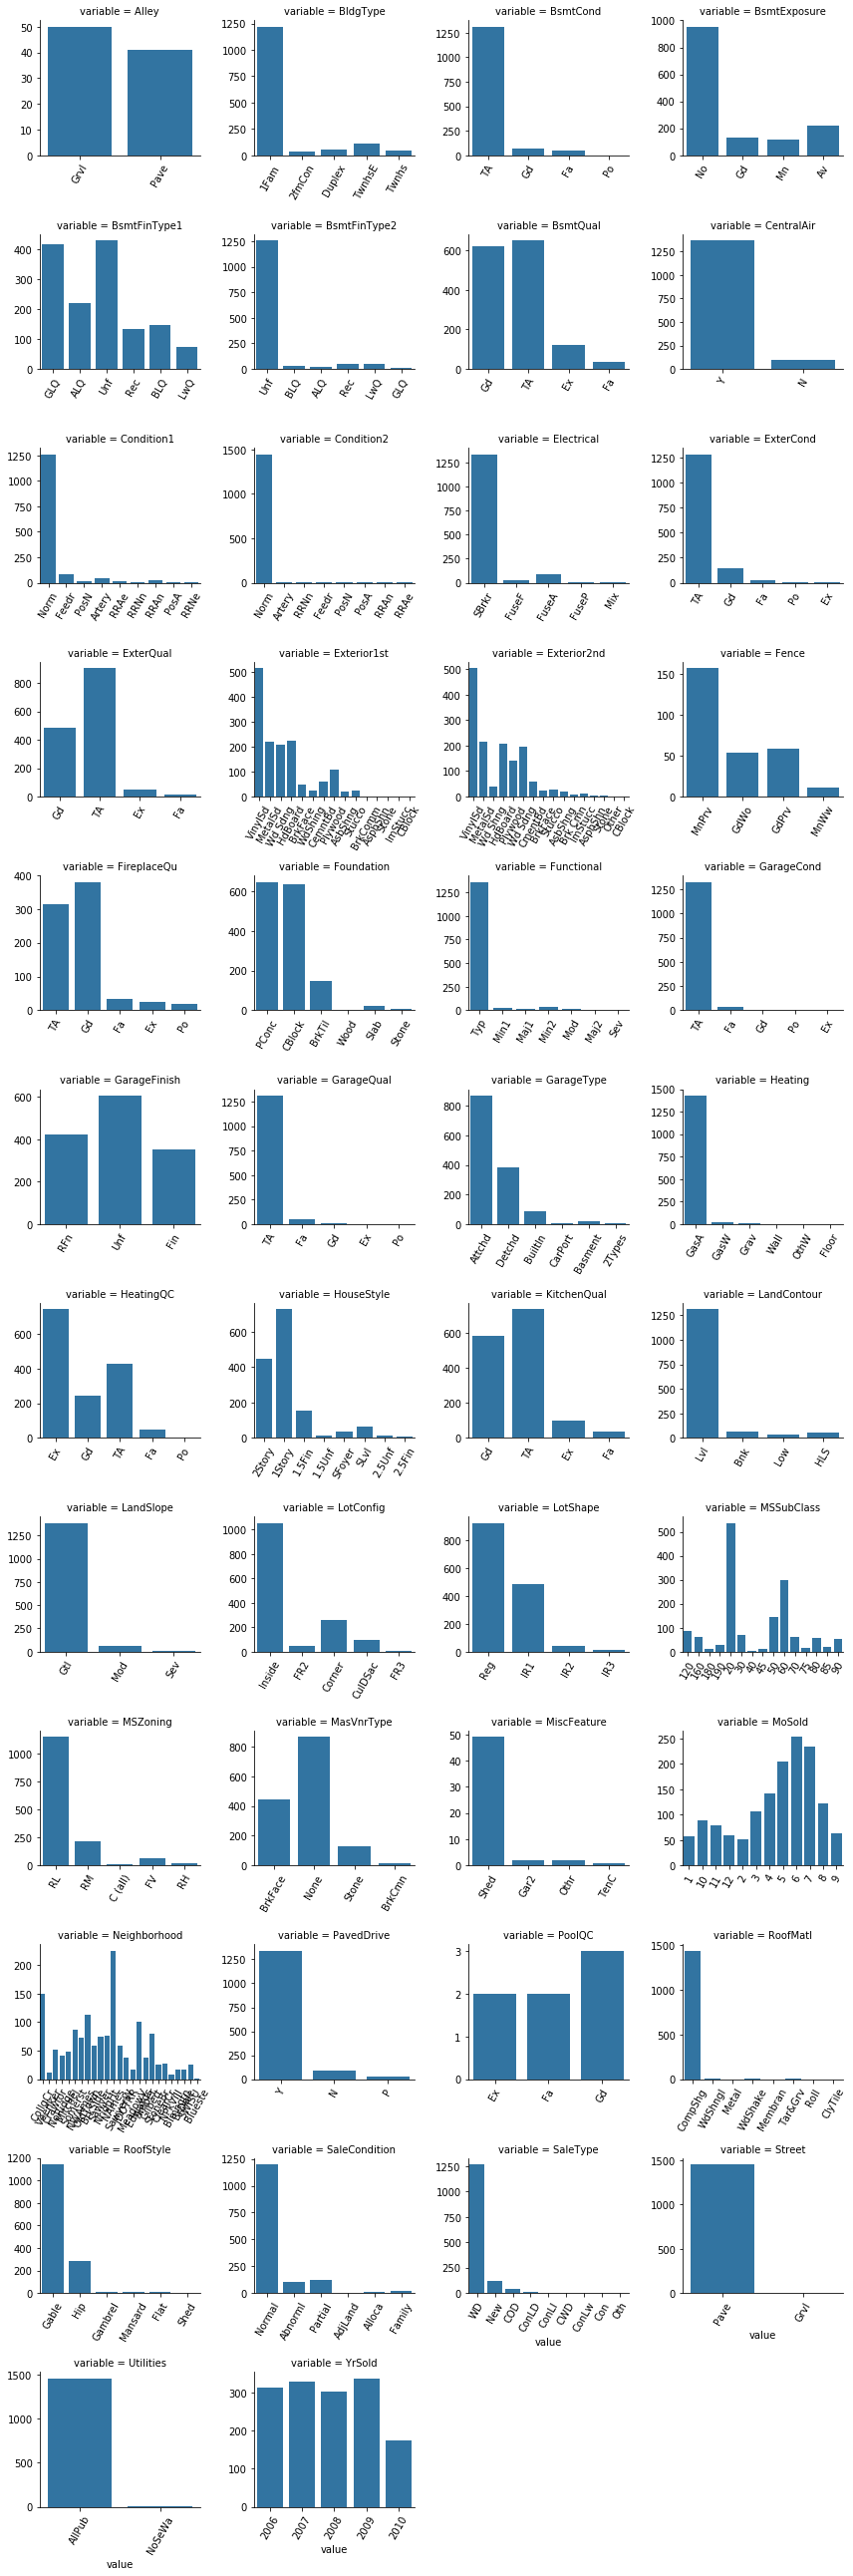

In [328]:
#Plot the count of Categorial Features

f = pd.melt(df_train, value_vars=sorted(categorial_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex=False, sharey=False)
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [329]:
list(categorial_data)

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [330]:

df_train.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [331]:
df_train.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [332]:
df_train.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [333]:
df_train.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [334]:
df_train.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [335]:
df_train.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [336]:
df_train.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [337]:
df_train.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [338]:
df_train.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [339]:
df_train.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [340]:
df_train.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [341]:
df_train.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [342]:
df_train.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [343]:
df_train.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [344]:
df_train.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [345]:
df_train.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [346]:
df_train.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [347]:
df_train.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [348]:
df_train.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [349]:
df_train.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [350]:
df_train.PavedDrive.unique()

array(['Y', 'N', 'P'], dtype=object)

In [351]:
df_train.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [352]:
df_train.Alley.replace({'Gravl':1, 'Pave':2}, inplace = True)

df_train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace = True)

df_train.BldgType.replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5}, inplace = True)

df_train.LandContour.replace({'Lvl':4, 'Bnk':3, 'Low':1, 'Hls':2}, inplace = True)

df_train.Utilities.replace({'NOSewa':2,'AllPub':4}, inplace = True)

df_train.LandSlope.replace({'Sav':1, 'Mod':2, 'Gtl':3}, inplace = True)

df_train.ExterQual.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace = True)

df_train.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace = True)

df_train.BsmtQual.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace = True)

df_train.BsmtCond.replace({'Po':1, 'Fa':2, 'Ta':3, 'Gd':4, 'Ex':5}, inplace = True)

df_train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace = True)

df_train.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':5}, inplace = True)

df_train.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':5}, inplace = True)

df_train.HeatingQC.replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, inplace = True)

df_train.KitchenQual.replace({'Gd':5, 'TA':4, 'Ex':3, 'Fa':2}, inplace = True)

df_train.Functional.replace({'Typ':8, 'Min1':7, 'Maj1':4, 'Min2':6, 'Mod':5, 'Maj2':3, 'Sev':2}, inplace = True)

df_train.FireplaceQu.replace({'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1}, inplace = True)

df_train.GarageFinish.replace({'RFn':2, 'Unf':1, 'Fin':3}, inplace = True)

df_train.GarageQual.replace({'TA':3, 'Fa':2, 'Gd':4, 'Ex':5, 'Po':1}, inplace = True)

df_train.GarageCond.replace({'TA':3, 'Fa':2, 'Gd':4, 'Po':1, 'Ex':5}, inplace = True)

df_train.PavedDrive.replace({'Y':3, 'N':1, 'P':2}, inplace = True)

df_train.PoolQC.replace({'Ex':5, 'Fa':2, 'Gd':4}, inplace = True)

In [353]:
cat_to_num_features = [
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'BldgType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC'                    
]

In [354]:
df_train[cat_to_num_features] = df_train[cat_to_num_features].fillna(0)
df_train[cat_to_num_features].head()

,Alley,LotShape,LandContour,Utilities,LandSlope,BldgType,ExterQual,ExterCond,BsmtQual,BsmtCond,...,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC
0,0,1,4,4,3,1,4,3,4.0,TA,...,1.0,5,5,8,0.0,2.0,3.0,3.0,3,0.0
1,0,1,4,4,3,1,3,3,4.0,TA,...,1.0,5,4,8,3.0,2.0,3.0,3.0,3,0.0
2,0,2,4,4,3,1,4,3,4.0,TA,...,1.0,5,5,8,3.0,2.0,3.0,3.0,3,0.0
3,0,2,4,4,3,1,3,3,3.0,4,...,1.0,4,5,8,4.0,1.0,3.0,3.0,3,0.0
4,0,2,4,4,3,1,4,3,4.0,TA,...,1.0,5,5,8,3.0,2.0,3.0,3.0,3,0.0


In [355]:
#Finding numerical Features

numeric_data = df_train.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = df_train.select_dtypes(exclude = np.number)


In [356]:
print("There are", numeric_data.shape[1], "dataset features")

There are 52 dataset features


In [357]:
print("There are", categorial_data.shape[1], "dataset features")

There are 29 dataset features


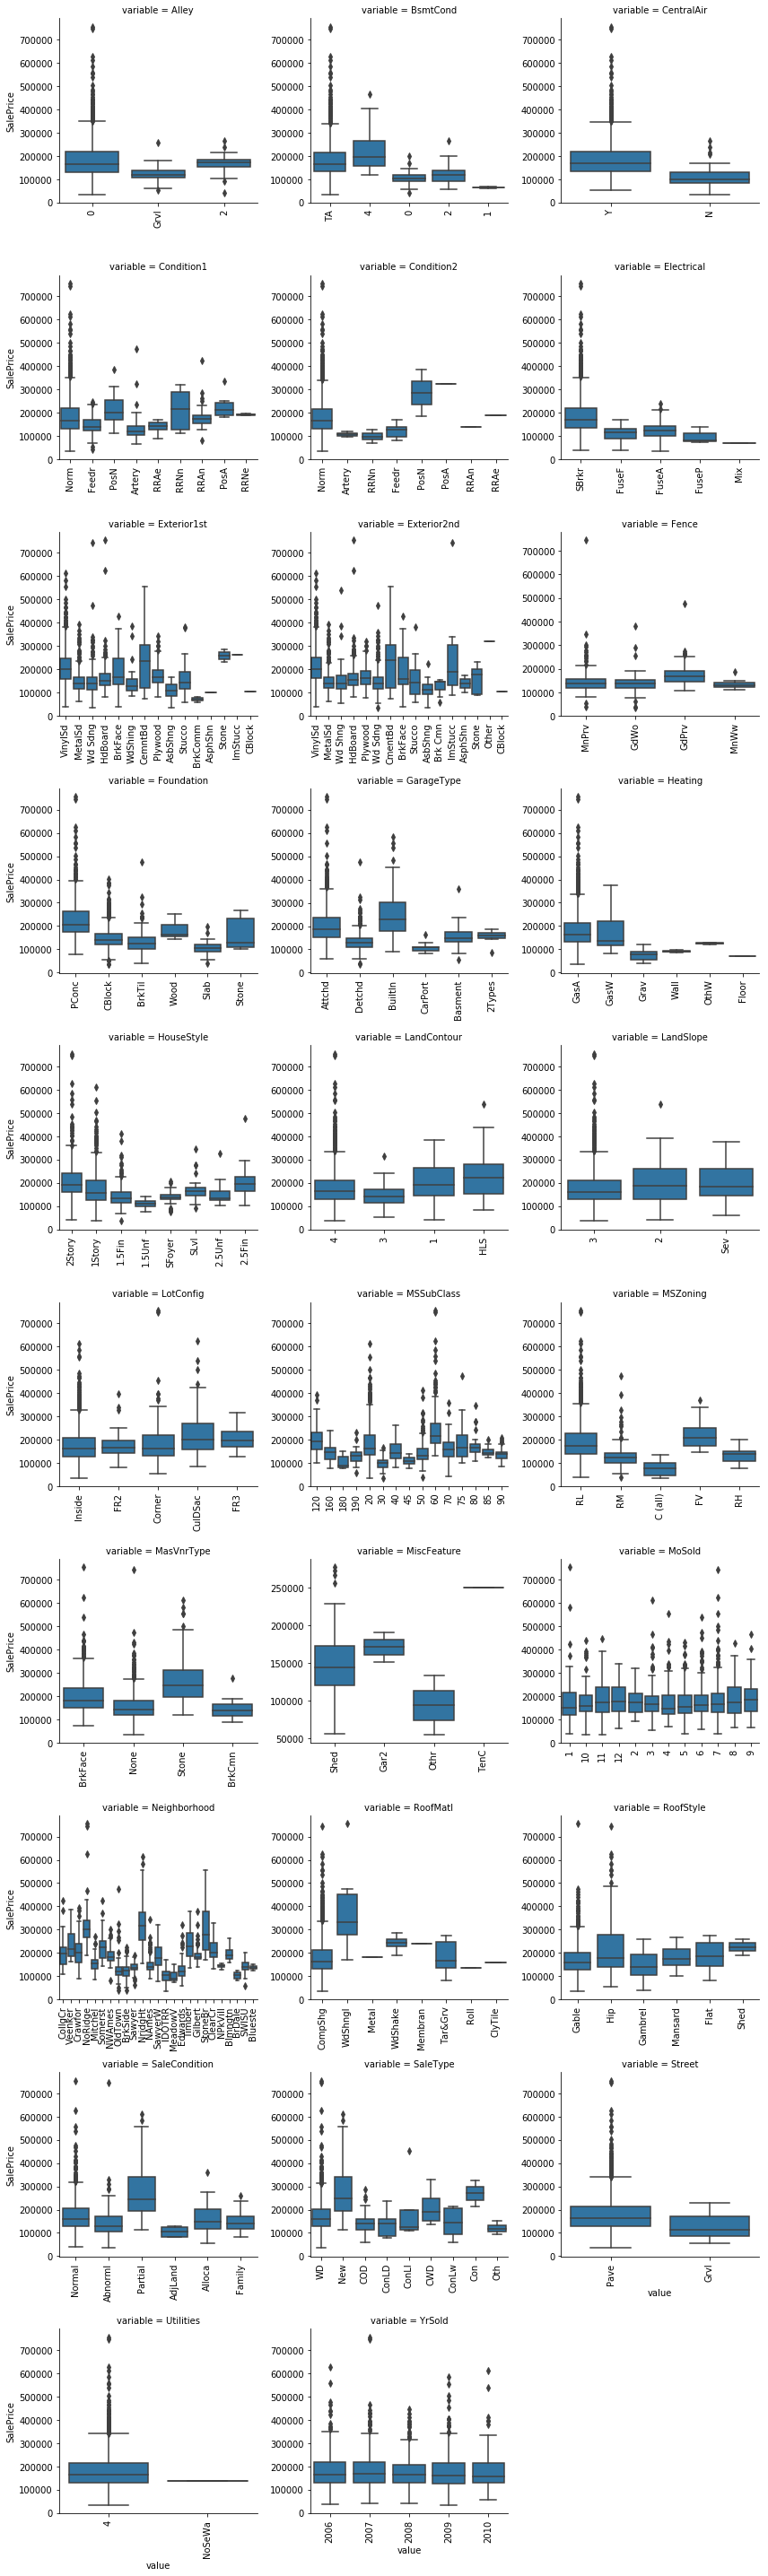

In [358]:
#Plot the count of Categorial Features

f = pd.melt(df_train, id_vars=['SalePrice'], value_vars = sorted(categorial_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [359]:
import scipy.stats
cat_features = categorial_data.columns
df_train[cat_features] = df_train[cat_features].fillna('Missing')

anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in df_train[cat].unique():
        group_prices.append(df_train[df_train[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

In [360]:
anova

,feature,f,p
8,Neighborhood,71.784865,1.558600e-225
17,Foundation,100.253851,5.791895e-91
22,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
16,MasVnrType,84.672201,1.054025e-64
28,SaleCondition,45.578428,7.988268e-44
14,Exterior1st,18.611743,2.586089e-43
15,Exterior2nd,17.500840,4.842186e-43
27,SaleType,28.863054,5.039767e-42
1,MSZoning,43.840282,8.817634e-35


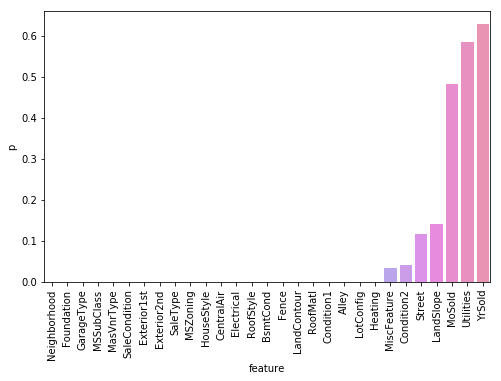

In [361]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, anova['p'])
plt.xticks(rotation = 90)
plt.show()

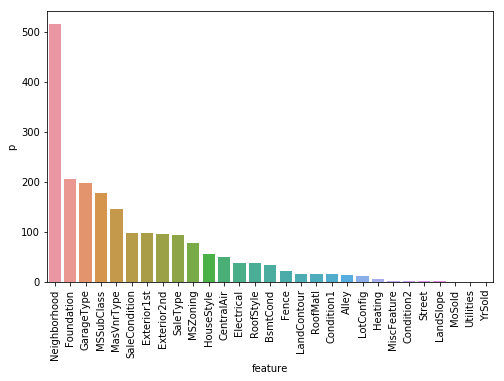

In [362]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, np.log(1/anova['p']))
plt.xticks(rotation = 90)
plt.show()

In [363]:
missing_values = (df_train[cat_features] == 'Missing').sum().sort_values(ascending = False)
missing_values[missing_values > 0]

MiscFeature    1406
Fence          1179
GarageType       81
MasVnrType        8
Electrical        1
dtype: int64

In [364]:
df_train.loc[df_train.Electrical == 'Missing', 'Electrical'] = df_train.Electrical.mode()[0]

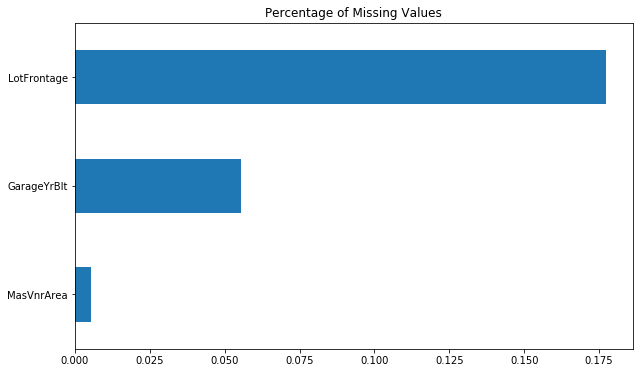

In [365]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data[missing_data > 0].\
   sort_values(ascending = True).\
   plot(kind = 'barh', figsize=(10,6))
plt.title('Percentage of Missing Values')
plt.show()

In [366]:
df_train.LotFrontage = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

df_train.GarageYrBlt.fillna(0, inplace= True)

df_train.MasVnrArea.fillna(0, inplace = True)

In [367]:
df_train.MasVnrType.replace({'Missing':'None'}, inplace=True)


df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace'
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea == 1), 'MasVnrArea'] = 0
for vnr_type in df_train.MasVnrType.unique():
    df_train.loc[(df_train.MasVnrType == vnr_type) & (df_train.MasVnrArea == 0), 'MasVnrArea'] = \
        df_train[df_train.MasVnrType == vnr_type].MasVnrArea.mean()

In [368]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [369]:
#Check wheather Duplilcates are still available

print('Train Set dublicate IDs: ',format(df_train.duplicated('Id').sum()))
print('Test Set dublicate IDs: ',format(df_test.duplicated('Id').sum()))

Train Set dublicate IDs:  0
Test Set dublicate IDs:  0


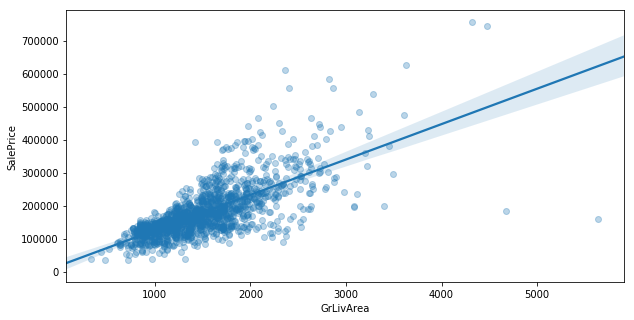

In [370]:
#Check for outliers

plt.figure(figsize= (10,5))
sns.regplot(df_train.GrLivArea, df_train.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [371]:
df_train.drop(df_train[df_train.GrLivArea >= 4000].index, inplace= True)

In [372]:
#Calculation of total sq feet of the house

df_train['TotalSF'] = df_train.TotalBsmtSF + df_train.GrLivArea
df_train['TotalFloorSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalPorchSF'] = df_train.OpenPorchSF + df_train.EnclosedPorch + \
    df_train['3SsnPorch'] + df_train['ScreenPorch']


In [373]:
df_train['HasBasement'] = df_train.TotalBsmtSF.apply(lambda x: 1 if x>0 else 0)
df_train['HasGarage'] = df_train.GarageArea.apply(lambda x: 1 if x>0 else 0)
df_train['HasPorch'] = df_train.TotalPorchSF.apply(lambda x: 1 if x>0 else 0)
df_train['HasPool'] = df_train.PoolArea.apply(lambda x: 1 if x>0 else 0)
df_train['HasRemodeled'] = (df_train.YearRemodAdd != df_train.YearBuilt).astype(np.int64)
df_train['IsNew'] = (df_train.YearBuilt > 2000).astype(np.int64)
df_train['WasCompleted'] = (df_train.SaleCondition != 'Partial').astype(np.int64)

In [374]:
Boolean_features = ['HasBasement','HasGarage','HasPorch','HasPool','HasRemodeled','IsNew','WasCompleted']

In [375]:
#Finding numerical Features

numeric_data = df_train.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = df_train.select_dtypes(exclude = np.number)

#print their number

print("There are", numeric_data.shape[1], "numerical dataset features")
print("There are", categorial_data.shape[1], "categorial dataset features")

num_features = numeric_data.columns
cat_features = categorial_data.columns

num_features = [f for f in num_features if f not in Boolean_features]

There are 62 numerical dataset features
There are 29 categorial dataset features


In [376]:
#Total Bathrooms

df_train['TotalBathrooms'] = df_train.FullBath + .5*df_train.HalfBath + df_train.BsmtFullBath + .5*df_train.BsmtHalfBath

In [377]:
#Finding numerical Features

numeric_data = df_train.select_dtypes(include = np.number)

#Finding categorial Features

categorial_data = df_train.select_dtypes(exclude = np.number)

#print their number

print("There are", numeric_data.shape[1], "numerical dataset features")
print("There are", categorial_data.shape[1], "categorial dataset features")

num_features = numeric_data.columns
cat_features = categorial_data.columns

num_features = [f for f in num_features if f not in Boolean_features]

There are 63 numerical dataset features
There are 29 categorial dataset features


In [378]:
features = num_features + ['SalePrice']
for f in features :
    df_train.loc[:,f] = np.log1p(df_train[f])

In [379]:
y = df_train['SalePrice']
df_train.drop('SalePrice', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)

#Get dummies one hot encoding method

model_data = pd.get_dummies(df_train).copy()

In [380]:
model_data.head()

,LotFrontage,LotArea,LotShape,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,0.693147,0.693147,2.079442,1.791759,7.602900,7.602900,5.283204,1.609438,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,0.693147,0.693147,1.945910,2.197225,7.589336,7.589336,0.000000,1.386294,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,1.098612,0.693147,2.079442,1.791759,7.601902,7.602401,5.093750,1.609438,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,1.098612,0.693147,2.079442,1.791759,7.557995,7.586296,0.000000,1.386294,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,1.098612,0.693147,2.197225,1.791759,7.601402,7.601402,5.860786,1.609438,...,0,0,0,1,0,0,0,0,1,0


In [381]:
from  sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(model_data.copy(), y,test_size=0.3, random_state= 42)
print('Shapes')
print('X_train: ',X_train.shape)
print('X_val: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_val: ',y_test.shape)

Shapes
X_train:  (1019, 271)
X_val:  (437, 271)
y_train:  (1019,)
y_val:  (437,)


In [382]:
from sklearn.preprocessing import RobustScaler, StandardScaler

#Remove Id and SalePrice
num_features.remove('Id')
num_features.remove('SalePrice')

#Reason is to make feature means 0 and standard deviation 1
stdsc = StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.transform(X_test[num_features])


In [383]:
from sklearn.model_selection import cross_val_score

def rmse(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [384]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1.,5.,10.,25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train,y_train)
alpha = lasso.best_params_['alpha']

#Home in
param_grid = {'alpha': [x/100. *alpha for x in range(50,150,5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RMSE: {:.5f} | alpha: {:.5f}'.format(
    rmse(lasso, X_train, y_train).mean(), rmse(lasso, X_test, y_test).mean(),alpha))


Lasso -> Train RSME: 0.00881 | Test RMSE: 0.00924 | alpha: 0.00007


Lasso dropped 182 of  271 features.


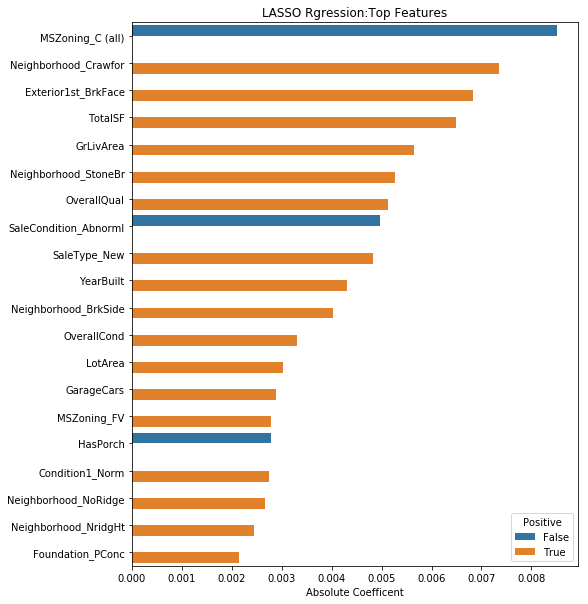

In [385]:
import seaborn as sns
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('Lasso dropped {} of  {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient = 'h', hue = top_coefs.Positive)
plt.title('LASSO Rgression:Top Features')
plt.xlabel('Absolute Coefficent')
plt.show()

In [386]:
#Now applying ML XGBoost Libraries

import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma =0.0,
                       learning_rate = 0.05,
                       max_depth = 6,
                       min_child_weight = 1.5,
                       n_estimators = 7200,
                       reg_alpha = 0.9,
                       reg_lambda = 0.6,
                       subsample = 0.2,
                       seed = 42,
                       silent=1)

regr.fit(X_train[top_coefs.index],y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
       silent=1, subsample=0.2, verbosity=1)

In [387]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

y_pred = regr.predict(X_test[top_coefs.index])

print('XGBoost score on training set:', rmse(y_test,y_pred))

XGBoost score on training set: 0.014585245849676059
